# **Universidad de La Sabana**

## Jugando con Datos de [Estadística Delictiva](https://www.policia.gov.co/grupo-informacion-criminalidad/estadistica-delictiva)

El siguiente notebook contiene un flujo de trabajo que muestra una forma de proceder en la manera de limpiar y explorar información. En particular usaremos datos públicos de la Policia Nacional sobre denuncias de homicidios.

Primero cargamos el drive al entorno de Colab para poder leer los archivos:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Semana_2')

Mounted at /content/gdrive


E instalaremos algunos requerimientos para poder leer correctamente archivos tipo `.xlsx`:

In [ ]:
!pip install Unidecode
!pip install --upgrade xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.7 MB/s eta 0:00:00


# Data Lesiones Homicidios

Importamos librerías y leemos los archivos:

In [ ]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from unidecode import unidecode

Creamos una lista de todos los archivos que vamos a leer:

In [ ]:
files_1 = ['/content/gdrive/My Drive/Semana_2/data/homicidios/' + str(i) + '.xlsx' for i in range(2010, 2013)]
files_2 = ['/content/gdrive/My Drive/Semana_2/data/homicidios/' + str(i) + '.xls' for i in range(2013, 2020)]
files = files_1+files_2
print(files)

['/content/gdrive/My Drive/Semana_2/data/homicidios/2010.xlsx', '/content/gdrive/My Drive/Semana_2/data/homicidios/2011.xlsx', '/content/gdrive/My Drive/Semana_2/data/homicidios/2012.xlsx', '/content/gdrive/My Drive/Semana_2/data/homicidios/2013.xls', '/content/gdrive/My Drive/Semana_2/data/homicidios/2014.xls', '/content/gdrive/My Drive/Semana_2/data/homicidios/2015.xls', '/content/gdrive/My Drive/Semana_2/data/homicidios/2016.xls', '/content/gdrive/My Drive/Semana_2/data/homicidios/2017.xls', '/content/gdrive/My Drive/Semana_2/data/homicidios/2018.xls', '/content/gdrive/My Drive/Semana_2/data/homicidios/2019.xls']


In [ ]:
all_dfs = []

for file in files:
    temp = pd.read_excel(file)

    # Eliminar acentos en el nombre de las columnas
    temp.columns = [unidecode(str(col)) for col in temp.columns]
    # Reemplazar espacios por _
    temp.columns = temp.columns.str.replace(' ', '_')

    # Strip
    temp.columns = temp.columns.str.strip()

    # Reemplazar Mayusculas por minusculas
    temp.columns = temp.columns.str.lower()

    # Reemplazar NaN, None
    temp.replace('-', np.nan, inplace=True)

    # Set axis name
    temp.rename_axis('id', inplace=True)

    all_dfs.append(temp)

Cambiamos el nombre de algunas columnas:

In [ ]:
renaming={
    'clase_sitio':'clase_de_sitio',
    'pais_nace':'pais_de_nacimiento',
    'clase_empleado':'clase_de_empleado'
}

for i in range(len(all_dfs)):
    all_dfs[i].rename(columns=renaming, inplace=True)

df_f = pd.concat(all_dfs, axis=0)

Echamos un vistazo al dataframe

In [ ]:
df_f

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,...,pais_de_nacimiento,clase_de_empleado,profesiones,escolaridad,codigo_dane,2010,2011,2012,profesion,cantidad
id,,,,,,,,,,,,,,,,,,,,,
0,2010-01-01 00:00:00,ANTIOQUIA,AMAGÁ,Viernes,14:00:00,MALABRIGO PARTE ALTA,RURAL,FINCAS Y SIMILARES,ARMA BLANCA,A PIE,...,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,PRIMARIA,5030000.0,1.0,NaN,NaN,NaN,NaN
1,2010-01-01 00:00:00,ANTIOQUIA,COPACABANA,Viernes,08:30:00,LA MISERICORDIA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,A PIE,...,COLOMBIA,INDEPENDIENTE,NO REPORTADO,SECUNDARIA,5212000.0,1.0,NaN,NaN,NaN,NaN
2,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,02:00:00,LAS GRANJAS C-3,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,COLOMBIA,DESEMPLEADO,NO REPORTADO,SECUNDARIA,5001000.0,1.0,NaN,NaN,NaN,NaN
3,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,...,COLOMBIA,ESTUDIANTE,NO REPORTADO,SECUNDARIA,5001000.0,1.0,NaN,NaN,NaN,NaN
4,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,...,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,SECUNDARIA,5001000.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,2019-12-31 00:00:00,VALLE,TULUÁ,Martes,23:50:00,Villa Liliana,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,BICICLETA,...,COLOMBIA,EMPLEADO PARTICULAR,NaN,SECUNDARIA,76834000.0,NaN,NaN,NaN,NaN,1.0
12513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12558.0
12514,FUENTE: DIJIN-POLICÍA NACI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_f.isnull().sum()

fecha                      5
departamento              40
municipio                 40
dia                       40
hora                      40
barrio                  5119
zona                      40
clase_de_sitio            40
arma_empleada             51
movil_agresor            712
movil_victima            522
edad                      84
sexo                      40
estado_civil             688
pais_de_nacimiento      1678
clase_de_empleado         40
profesiones            89689
escolaridad              868
codigo_dane               40
2010                  121392
2011                  120606
2012                  120374
profesion             131991
cantidad               46687
dtype: int64

Eliminamos algunas columnas:

In [ ]:
df_f.drop(columns=['2010','2011','2012','profesion'], inplace=True)

In [ ]:
df_f

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,movil_victima,edad,sexo,estado_civil,pais_de_nacimiento,clase_de_empleado,profesiones,escolaridad,codigo_dane,cantidad
id,,,,,,,,,,,,,,,,,,,,
0,2010-01-01 00:00:00,ANTIOQUIA,AMAGÁ,Viernes,14:00:00,MALABRIGO PARTE ALTA,RURAL,FINCAS Y SIMILARES,ARMA BLANCA,A PIE,A PIE,49,MASCULINO,CASADO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,PRIMARIA,5030000.0,NaN
1,2010-01-01 00:00:00,ANTIOQUIA,COPACABANA,Viernes,08:30:00,LA MISERICORDIA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,A PIE,A PIE,32,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,NO REPORTADO,SECUNDARIA,5212000.0,NaN
2,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,02:00:00,LAS GRANJAS C-3,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,33,MASCULINO,UNION LIBRE,COLOMBIA,DESEMPLEADO,NO REPORTADO,SECUNDARIA,5001000.0,NaN
3,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,ESTUDIANTE,NO REPORTADO,SECUNDARIA,5001000.0,NaN
4,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,SECUNDARIA,5001000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,2019-12-31 00:00:00,VALLE,TULUÁ,Martes,23:50:00,Villa Liliana,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,BICICLETA,A PIE,19.0,MASCULINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,NaN,SECUNDARIA,76834000.0,1.0
12513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12558.0
12514,FUENTE: DIJIN-POLICÍA NACI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_f = df_f.reset_index()

In [ ]:
df_f

,id,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,...,movil_victima,edad,sexo,estado_civil,pais_de_nacimiento,clase_de_empleado,profesiones,escolaridad,codigo_dane,cantidad
0,0,2010-01-01 00:00:00,ANTIOQUIA,AMAGÁ,Viernes,14:00:00,MALABRIGO PARTE ALTA,RURAL,FINCAS Y SIMILARES,ARMA BLANCA,...,A PIE,49,MASCULINO,CASADO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,PRIMARIA,5030000.0,NaN
1,1,2010-01-01 00:00:00,ANTIOQUIA,COPACABANA,Viernes,08:30:00,LA MISERICORDIA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,...,A PIE,32,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,NO REPORTADO,SECUNDARIA,5212000.0,NaN
2,2,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,02:00:00,LAS GRANJAS C-3,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,...,A PIE,33,MASCULINO,UNION LIBRE,COLOMBIA,DESEMPLEADO,NO REPORTADO,SECUNDARIA,5001000.0,NaN
3,3,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,...,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,ESTUDIANTE,NO REPORTADO,SECUNDARIA,5001000.0,NaN
4,4,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,...,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,SECUNDARIA,5001000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136338,12512,2019-12-31 00:00:00,VALLE,TULUÁ,Martes,23:50:00,Villa Liliana,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,...,A PIE,19.0,MASCULINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,NaN,SECUNDARIA,76834000.0,1.0
136339,12513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12558.0
136340,12514,FUENTE: DIJIN-POLICÍA NACI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136341,12515,Elaboró: PT. Andrés Felipe Taborda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_f.drop(columns=['id'], inplace=True)

In [ ]:
df_f

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,movil_victima,edad,sexo,estado_civil,pais_de_nacimiento,clase_de_empleado,profesiones,escolaridad,codigo_dane,cantidad
0,2010-01-01 00:00:00,ANTIOQUIA,AMAGÁ,Viernes,14:00:00,MALABRIGO PARTE ALTA,RURAL,FINCAS Y SIMILARES,ARMA BLANCA,A PIE,A PIE,49,MASCULINO,CASADO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,PRIMARIA,5030000.0,NaN
1,2010-01-01 00:00:00,ANTIOQUIA,COPACABANA,Viernes,08:30:00,LA MISERICORDIA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,A PIE,A PIE,32,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,NO REPORTADO,SECUNDARIA,5212000.0,NaN
2,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,02:00:00,LAS GRANJAS C-3,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,33,MASCULINO,UNION LIBRE,COLOMBIA,DESEMPLEADO,NO REPORTADO,SECUNDARIA,5001000.0,NaN
3,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,ESTUDIANTE,NO REPORTADO,SECUNDARIA,5001000.0,NaN
4,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,SECUNDARIA,5001000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136338,2019-12-31 00:00:00,VALLE,TULUÁ,Martes,23:50:00,Villa Liliana,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,BICICLETA,A PIE,19.0,MASCULINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,NaN,SECUNDARIA,76834000.0,1.0
136339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12558.0
136340,FUENTE: DIJIN-POLICÍA NACI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136341,Elaboró: PT. Andrés Felipe Taborda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_f = df_f[df_f.isnull().sum(axis=1) < 5]

In [ ]:
df_f

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,movil_victima,edad,sexo,estado_civil,pais_de_nacimiento,clase_de_empleado,profesiones,escolaridad,codigo_dane,cantidad
0,2010-01-01 00:00:00,ANTIOQUIA,AMAGÁ,Viernes,14:00:00,MALABRIGO PARTE ALTA,RURAL,FINCAS Y SIMILARES,ARMA BLANCA,A PIE,A PIE,49,MASCULINO,CASADO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,PRIMARIA,5030000.0,NaN
1,2010-01-01 00:00:00,ANTIOQUIA,COPACABANA,Viernes,08:30:00,LA MISERICORDIA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,A PIE,A PIE,32,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,NO REPORTADO,SECUNDARIA,5212000.0,NaN
2,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,02:00:00,LAS GRANJAS C-3,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,33,MASCULINO,UNION LIBRE,COLOMBIA,DESEMPLEADO,NO REPORTADO,SECUNDARIA,5001000.0,NaN
3,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,ESTUDIANTE,NO REPORTADO,SECUNDARIA,5001000.0,NaN
4,2010-01-01 00:00:00,ANTIOQUIA,MEDELLÍN (CT),Viernes,11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,SECUNDARIA,5001000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136334,2019-12-31 00:00:00,VALLE,CAICEDONIA,Martes,05:05:00,VALLE DEL CAUCA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,42.0,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NaN,PRIMARIA,76122000.0,1.0
136335,2019-12-31 00:00:00,VALLE,CALI (CT),Martes,20:50:00,VILLA DEL PRADO - EL GUABITO E5,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,36.0,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,NaN,SECUNDARIA,76001000.0,1.0
136336,2019-12-31 00:00:00,VALLE,CALI (CT),Martes,00:20:00,CIUDADELA FLORALIA E6,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,22.0,MASCULINO,SOLTERO,COLOMBIA,DESEMPLEADO,NaN,PRIMARIA,76001000.0,1.0
136337,2019-12-31 00:00:00,VALLE,CALI (CT),Martes,21:16:00,MARIO CORREA RENGIFO E18,URBANA,PELUQUERIA Y SIMILARES,ARMA DE FUEGO,CONDUCTOR MOTOCICLETA,A PIE,25.0,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,NaN,PRIMARIA,76001000.0,1.0


In [ ]:
df_f.isnull().sum()

fecha                     0
departamento              0
municipio                 0
dia                       0
hora                      0
barrio                 5067
zona                      0
clase_de_sitio            0
arma_empleada             9
movil_agresor           627
movil_victima           453
edad                     33
sexo                      0
estado_civil            585
pais_de_nacimiento     1577
clase_de_empleado         0
profesiones           89584
escolaridad             768
codigo_dane               0
cantidad              46654
dtype: int64

In [ ]:
df_f.hora = pd.to_datetime(df_f.hora, format='%H:%M:%S', errors='coerce')

<ipython-input-19-9fcbbbff297f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.hora = pd.to_datetime(df_f.hora, format='%H:%M:%S', errors='coerce')


In [ ]:
df_f.fecha = pd.to_datetime(df_f.fecha, errors='coerce')

<ipython-input-20-e3236e47ead6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.fecha = pd.to_datetime(df_f.fecha, errors='coerce')


In [ ]:
df_f

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,movil_victima,edad,sexo,estado_civil,pais_de_nacimiento,clase_de_empleado,profesiones,escolaridad,codigo_dane,cantidad
0,2010-01-01,ANTIOQUIA,AMAGÁ,Viernes,1900-01-01 14:00:00,MALABRIGO PARTE ALTA,RURAL,FINCAS Y SIMILARES,ARMA BLANCA,A PIE,A PIE,49,MASCULINO,CASADO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,PRIMARIA,5030000.0,NaN
1,2010-01-01,ANTIOQUIA,COPACABANA,Viernes,1900-01-01 08:30:00,LA MISERICORDIA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,A PIE,A PIE,32,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,NO REPORTADO,SECUNDARIA,5212000.0,NaN
2,2010-01-01,ANTIOQUIA,MEDELLÍN (CT),Viernes,1900-01-01 02:00:00,LAS GRANJAS C-3,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,33,MASCULINO,UNION LIBRE,COLOMBIA,DESEMPLEADO,NO REPORTADO,SECUNDARIA,5001000.0,NaN
3,2010-01-01,ANTIOQUIA,MEDELLÍN (CT),Viernes,1900-01-01 11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,ESTUDIANTE,NO REPORTADO,SECUNDARIA,5001000.0,NaN
4,2010-01-01,ANTIOQUIA,MEDELLÍN (CT),Viernes,1900-01-01 11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,SECUNDARIA,5001000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136334,2019-12-31,VALLE,CAICEDONIA,Martes,1900-01-01 05:05:00,VALLE DEL CAUCA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,42.0,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NaN,PRIMARIA,76122000.0,1.0
136335,2019-12-31,VALLE,CALI (CT),Martes,1900-01-01 20:50:00,VILLA DEL PRADO - EL GUABITO E5,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,36.0,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,NaN,SECUNDARIA,76001000.0,1.0
136336,2019-12-31,VALLE,CALI (CT),Martes,1900-01-01 00:20:00,CIUDADELA FLORALIA E6,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,22.0,MASCULINO,SOLTERO,COLOMBIA,DESEMPLEADO,NaN,PRIMARIA,76001000.0,1.0
136337,2019-12-31,VALLE,CALI (CT),Martes,1900-01-01 21:16:00,MARIO CORREA RENGIFO E18,URBANA,PELUQUERIA Y SIMILARES,ARMA DE FUEGO,CONDUCTOR MOTOCICLETA,A PIE,25.0,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,NaN,PRIMARIA,76001000.0,1.0


In [ ]:
df_f['year'] = df_f.fecha.dt.year

<ipython-input-22-c6089feca1ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['year'] = df_f.fecha.dt.year


In [ ]:
df_f['hora_int'] = df_f.hora.dt.hour

<ipython-input-23-279f8d2f50a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['hora_int'] = df_f.hora.dt.hour


In [ ]:
df_f

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,...,sexo,estado_civil,pais_de_nacimiento,clase_de_empleado,profesiones,escolaridad,codigo_dane,cantidad,year,hora_int
0,2010-01-01,ANTIOQUIA,AMAGÁ,Viernes,1900-01-01 14:00:00,MALABRIGO PARTE ALTA,RURAL,FINCAS Y SIMILARES,ARMA BLANCA,A PIE,...,MASCULINO,CASADO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,PRIMARIA,5030000.0,NaN,2010,14
1,2010-01-01,ANTIOQUIA,COPACABANA,Viernes,1900-01-01 08:30:00,LA MISERICORDIA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,A PIE,...,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,NO REPORTADO,SECUNDARIA,5212000.0,NaN,2010,8
2,2010-01-01,ANTIOQUIA,MEDELLÍN (CT),Viernes,1900-01-01 02:00:00,LAS GRANJAS C-3,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,MASCULINO,UNION LIBRE,COLOMBIA,DESEMPLEADO,NO REPORTADO,SECUNDARIA,5001000.0,NaN,2010,2
3,2010-01-01,ANTIOQUIA,MEDELLÍN (CT),Viernes,1900-01-01 11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,ESTUDIANTE,NO REPORTADO,SECUNDARIA,5001000.0,NaN,2010,11
4,2010-01-01,ANTIOQUIA,MEDELLÍN (CT),Viernes,1900-01-01 11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,SECUNDARIA,5001000.0,NaN,2010,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136334,2019-12-31,VALLE,CAICEDONIA,Martes,1900-01-01 05:05:00,VALLE DEL CAUCA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NaN,PRIMARIA,76122000.0,1.0,2019,5
136335,2019-12-31,VALLE,CALI (CT),Martes,1900-01-01 20:50:00,VILLA DEL PRADO - EL GUABITO E5,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,NaN,SECUNDARIA,76001000.0,1.0,2019,20
136336,2019-12-31,VALLE,CALI (CT),Martes,1900-01-01 00:20:00,CIUDADELA FLORALIA E6,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,DESEMPLEADO,NaN,PRIMARIA,76001000.0,1.0,2019,0
136337,2019-12-31,VALLE,CALI (CT),Martes,1900-01-01 21:16:00,MARIO CORREA RENGIFO E18,URBANA,PELUQUERIA Y SIMILARES,ARMA DE FUEGO,CONDUCTOR MOTOCICLETA,...,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,NaN,PRIMARIA,76001000.0,1.0,2019,21


In [ ]:
df_f.edad.replace('NO REPORTADO', np.nan, inplace=True)

<ipython-input-25-6c68d16e810c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.edad.replace('NO REPORTADO', np.nan, inplace=True)


In [ ]:
df_f.edad = df_f.edad.astype(float)

<ipython-input-26-bd2061eef6a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.edad = df_f.edad.astype(float)


In [ ]:
df_f.municipio.replace(' \(CT\)', '', regex=True, inplace=True)
df_f.municipio.replace('BOGOTÁ', 'BOGOTA D.C', inplace=True)
df_f.departamento.replace('BOGOTÁ', 'BOGOTA D.C', inplace=True)
df_f.departamento.replace('GUAJIRA', 'LA GUAJIRA', inplace=True)
df_f.departamento.replace('VALLE', 'VALLE DEL CAUCA', inplace=True)
df_f.departamento.replace('NARIÑO', 'NARINO', inplace=True)

<ipython-input-27-edce4a24c1f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.municipio.replace(' \(CT\)', '', regex=True, inplace=True)
<ipython-input-27-edce4a24c1f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.municipio.replace('BOGOTÁ', 'BOGOTA D.C', inplace=True)
<ipython-input-27-edce4a24c1f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.departamento.replace('BOGOTÁ', 'BOGOTA D.C', inplace=True)
<ipytho

In [ ]:
df_f

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,...,sexo,estado_civil,pais_de_nacimiento,clase_de_empleado,profesiones,escolaridad,codigo_dane,cantidad,year,hora_int
0,2010-01-01,ANTIOQUIA,AMAGÁ,Viernes,1900-01-01 14:00:00,MALABRIGO PARTE ALTA,RURAL,FINCAS Y SIMILARES,ARMA BLANCA,A PIE,...,MASCULINO,CASADO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,PRIMARIA,5030000.0,NaN,2010,14
1,2010-01-01,ANTIOQUIA,COPACABANA,Viernes,1900-01-01 08:30:00,LA MISERICORDIA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,A PIE,...,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,NO REPORTADO,SECUNDARIA,5212000.0,NaN,2010,8
2,2010-01-01,ANTIOQUIA,MEDELLÍN,Viernes,1900-01-01 02:00:00,LAS GRANJAS C-3,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,MASCULINO,UNION LIBRE,COLOMBIA,DESEMPLEADO,NO REPORTADO,SECUNDARIA,5001000.0,NaN,2010,2
3,2010-01-01,ANTIOQUIA,MEDELLÍN,Viernes,1900-01-01 11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,ESTUDIANTE,NO REPORTADO,SECUNDARIA,5001000.0,NaN,2010,11
4,2010-01-01,ANTIOQUIA,MEDELLÍN,Viernes,1900-01-01 11:10:00,ALEJANDRO ECHAVARRIA C-9,URBANA,ESCENARIOS DEPORTIVOS,ARMA DE FUEGO,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADO,SECUNDARIA,5001000.0,NaN,2010,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136334,2019-12-31,VALLE DEL CAUCA,CAICEDONIA,Martes,1900-01-01 05:05:00,VALLE DEL CAUCA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NaN,PRIMARIA,76122000.0,1.0,2019,5
136335,2019-12-31,VALLE DEL CAUCA,CALI,Martes,1900-01-01 20:50:00,VILLA DEL PRADO - EL GUABITO E5,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,NaN,SECUNDARIA,76001000.0,1.0,2019,20
136336,2019-12-31,VALLE DEL CAUCA,CALI,Martes,1900-01-01 00:20:00,CIUDADELA FLORALIA E6,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,MASCULINO,SOLTERO,COLOMBIA,DESEMPLEADO,NaN,PRIMARIA,76001000.0,1.0,2019,0
136337,2019-12-31,VALLE DEL CAUCA,CALI,Martes,1900-01-01 21:16:00,MARIO CORREA RENGIFO E18,URBANA,PELUQUERIA Y SIMILARES,ARMA DE FUEGO,CONDUCTOR MOTOCICLETA,...,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,NaN,PRIMARIA,76001000.0,1.0,2019,21


In [ ]:
for col in df_f.columns:
    print(col)
    print(df_f[col].unique())

fecha
['2010-01-01T00:00:00.000000000' '2010-01-02T00:00:00.000000000'
 '2010-01-03T00:00:00.000000000' ... '2019-12-29T00:00:00.000000000'
 '2019-12-30T00:00:00.000000000' '2019-12-31T00:00:00.000000000']
departamento
['ANTIOQUIA' 'ATLÁNTICO' 'BOLÍVAR' 'CALDAS' 'CAQUETÁ' 'CAUCA' 'CESAR'
 'CUNDINAMARCA' 'LA GUAJIRA' 'GUAVIARE' 'HUILA' 'NARINO' 'QUINDÍO'
 'RISARALDA' 'SANTANDER' 'SUCRE' 'TOLIMA' 'VALLE DEL CAUCA' 'CASANARE'
 'CHOCÓ' 'META' 'PUTUMAYO' 'ARAUCA' 'CÓRDOBA' 'NORTE DE SANTANDER'
 'BOYACÁ' 'MAGDALENA' 'VICHADA' 'SAN ANDRÉS' 'AMAZONAS' 'GUAINÍA' 'VAUPÉS']
municipio
['AMAGÁ' 'COPACABANA' 'MEDELLÍN' 'RIONEGRO' 'BARRANQUILLA' 'MALAMBO'
 'CARTAGENA' 'MAGANGUÉ' 'MARÍA LA BAJA' 'MOMPÓS' 'MANIZALES' 'SAN JOSÉ'
 'CARTAGENA DEL CHAIRÁ' 'CURILLO' 'FLORENCIA' 'ARGELIA' 'BALBOA' 'CAJIBÍO'
 'POPAYÁN' 'SANTANDER DE QUILICHAO' 'PAILITAS' 'BOGOTÁ D.C.' 'GUADUAS'
 'RIOHACHA' 'CALAMAR' 'ACEVEDO' 'NEIVA' 'LEIVA' 'PASTO'
 'SAN ANDRES DE TUMACO' 'TAMINANGO' 'ARMENIA' 'DOSQUEBRADAS' 'LA VIRGINIA'
 '

# EDA

In [ ]:
df_f.columns

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
# mpl.rcParams.keys()
sns.set_palette('Accent')

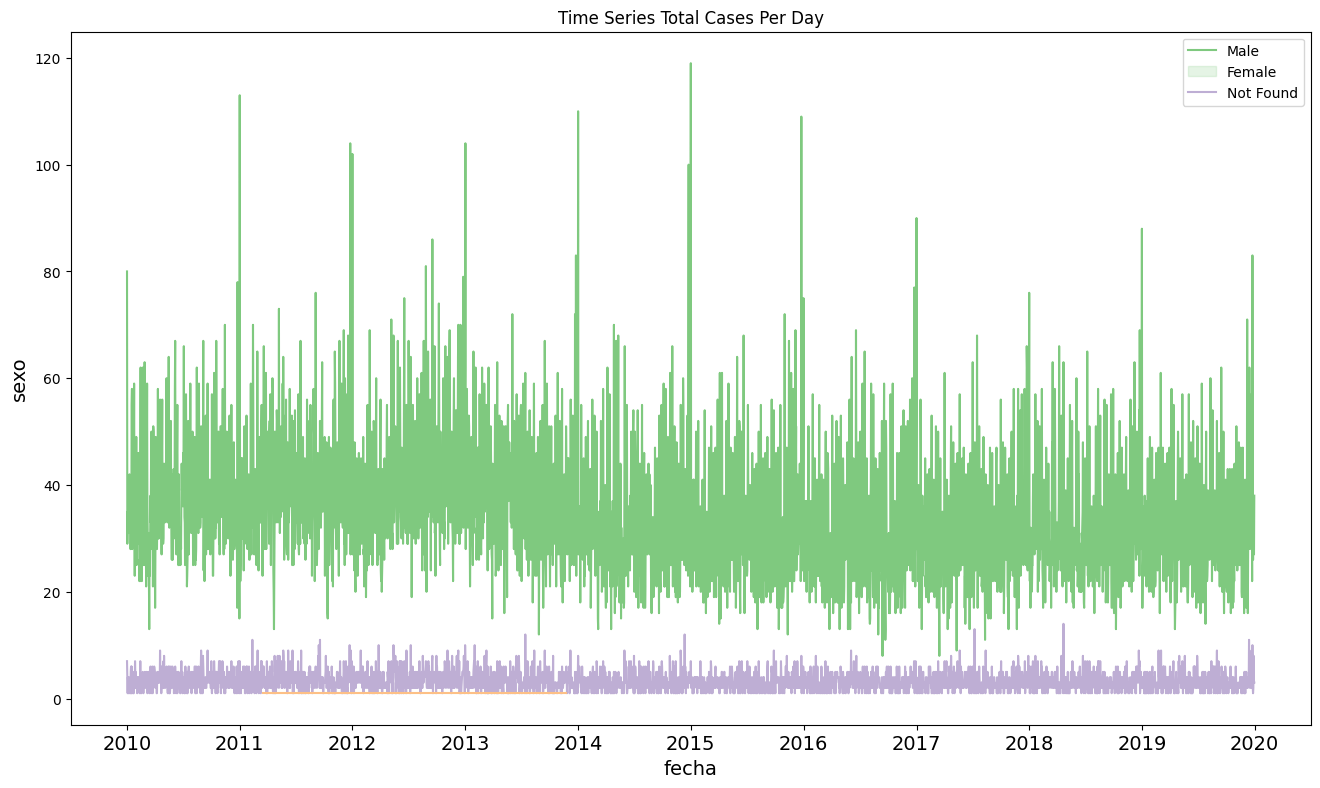

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(
                    data=df_f.groupby('fecha').apply(lambda df: df.sexo.value_counts()).reset_index(),
                    x='fecha',
                    y='sexo',
                    hue='level_1'
                 )

ax.set_title('Time Series Total Cases Per Day');
ax.legend(['Male', 'Female', 'Not Found']);

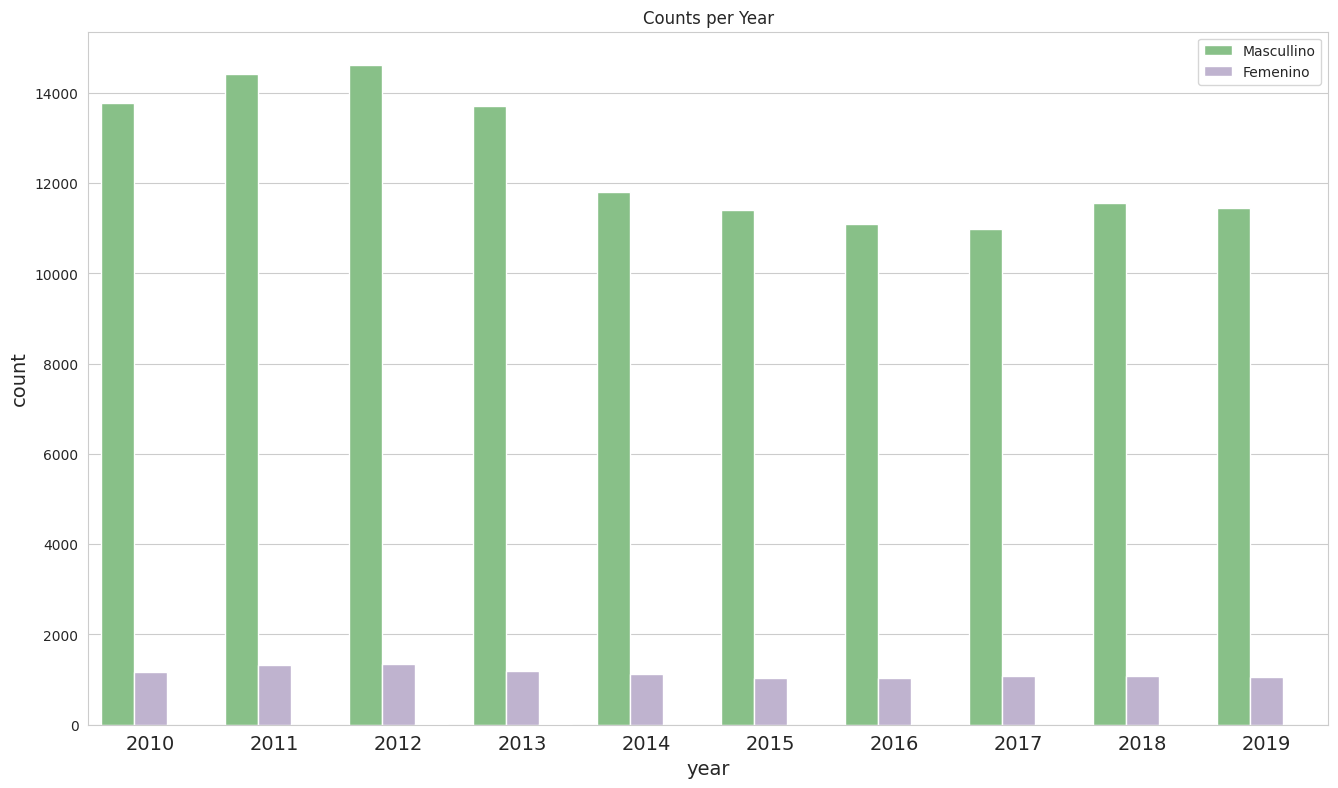

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
ax = sns.countplot(# count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
                   data = df_f,
                   x='year',
                   hue='sexo'
                  )

ax.set_title('Counts per Year');
ax.legend(['Mascullino', 'Femenino']);

plt.savefig('figura1.png')

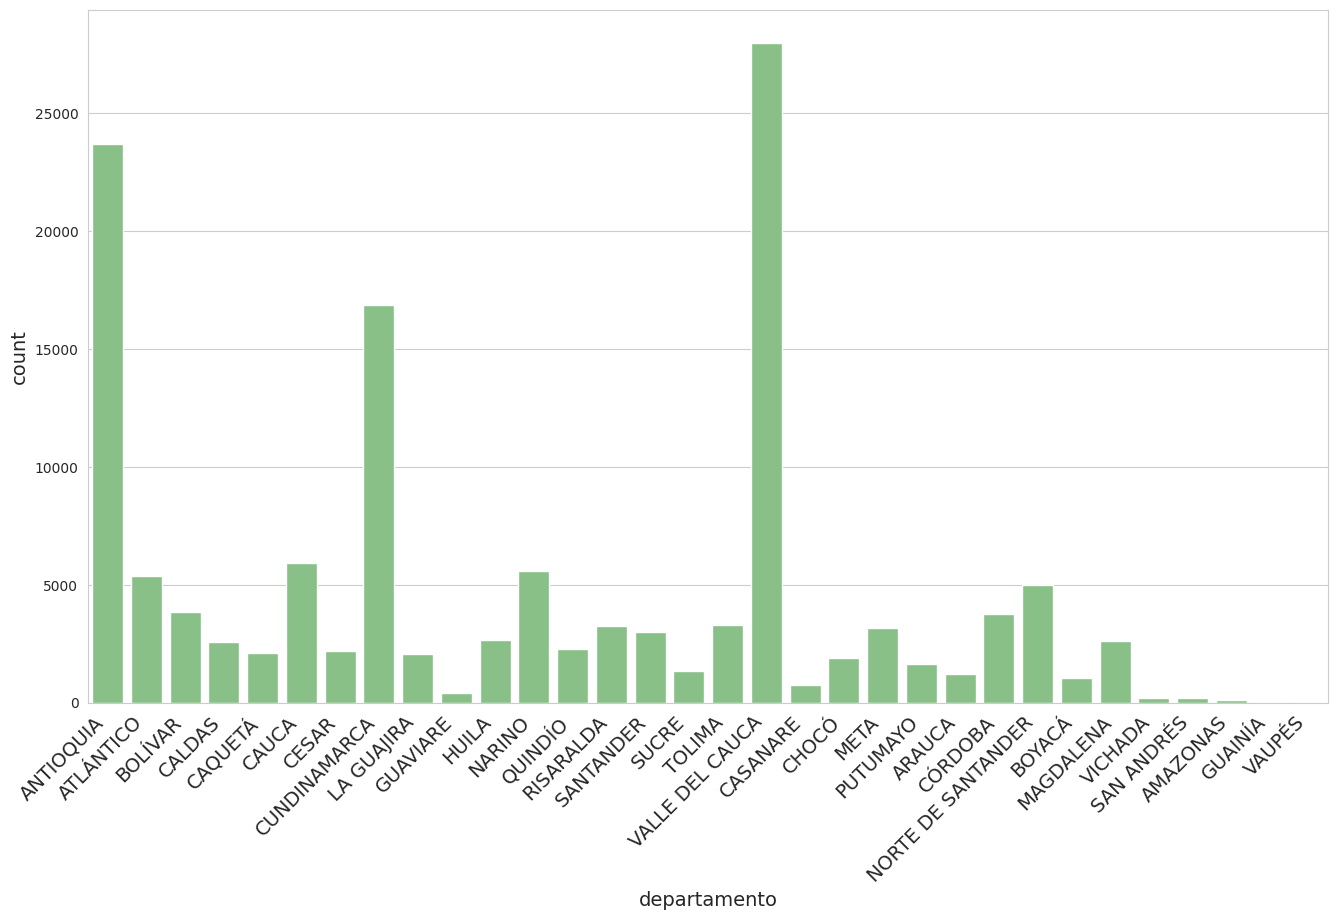

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
                    data=df_f,
                    x='departamento'
)

plt.xticks(rotation=45,ha='right');

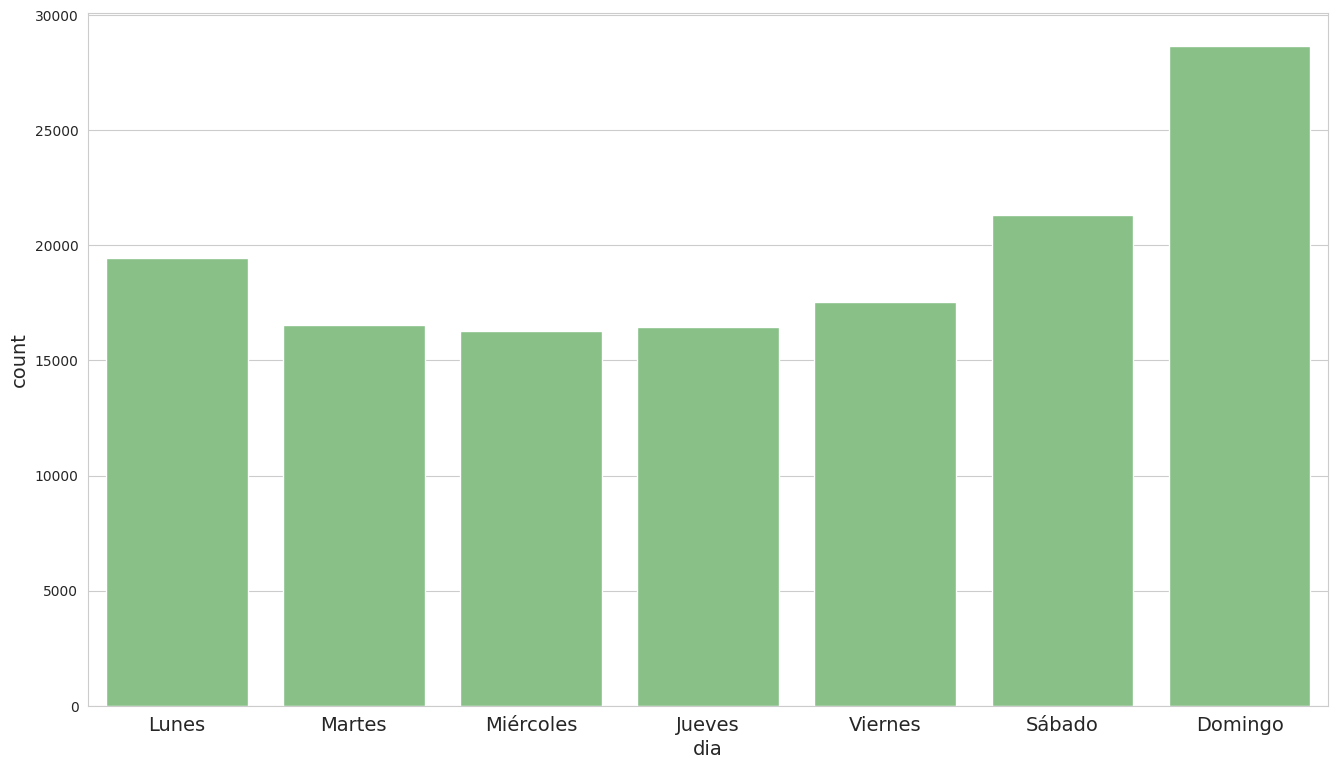

In [ ]:
plt.figure(figsize=(16,9))

order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ax = sns.countplot(
                   data=df_f,
                   x='dia',
                   order=order
                  )

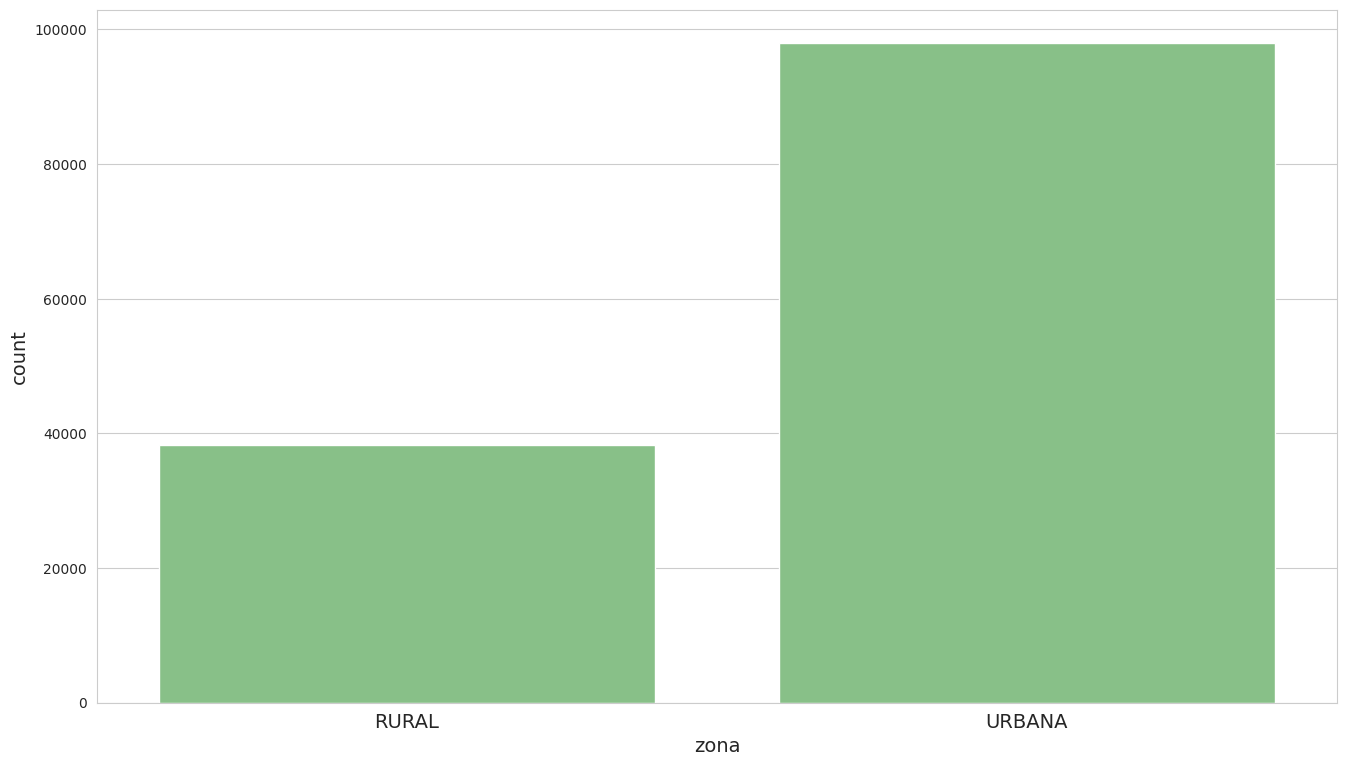

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_f,
    x='zona',
)

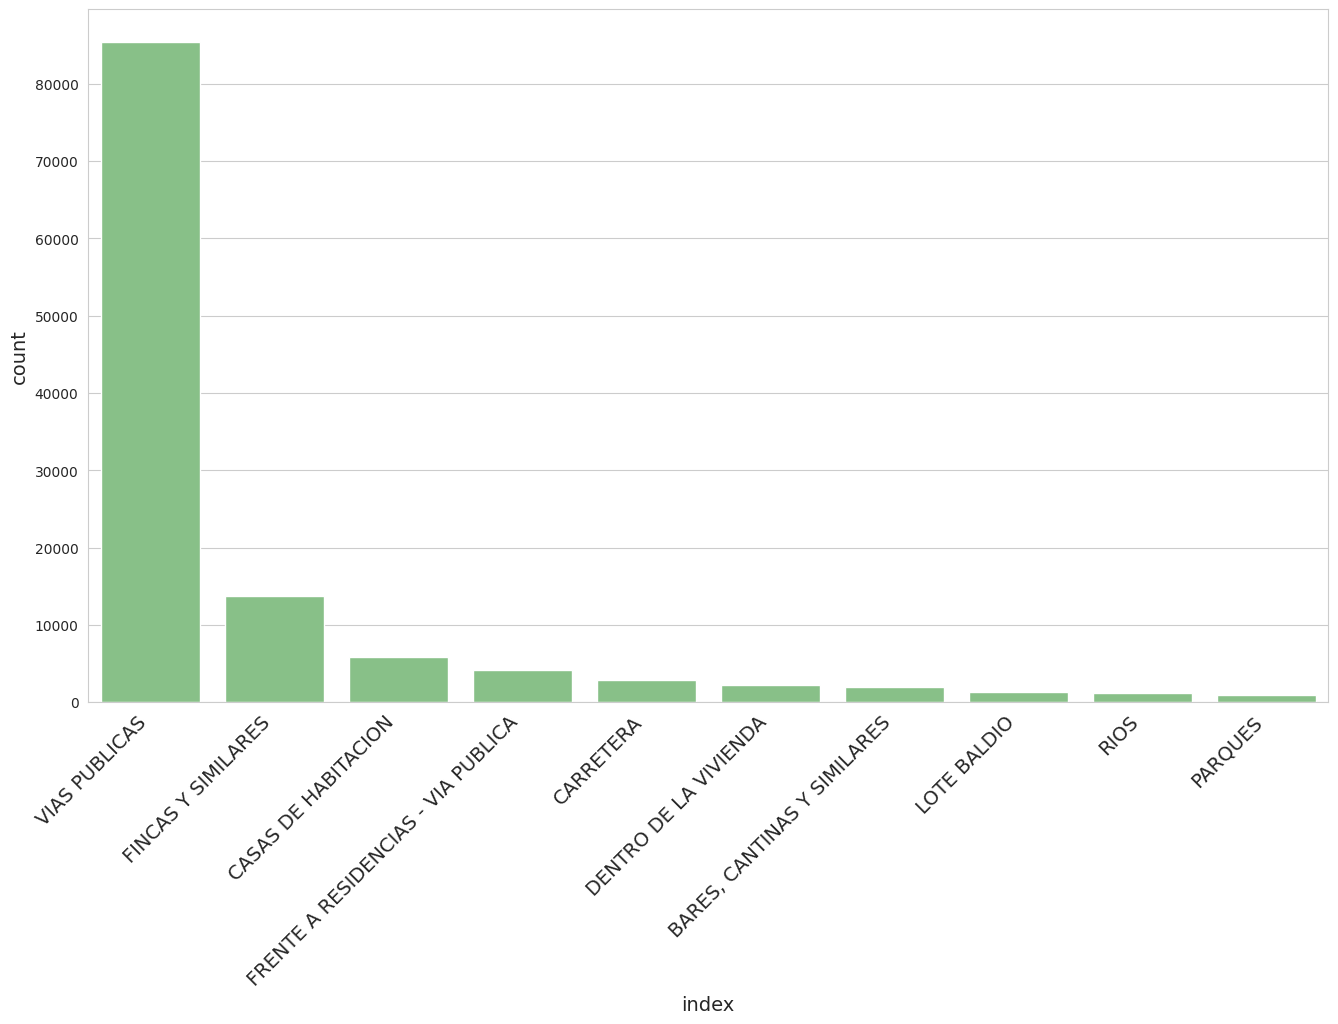

In [ ]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.clase_de_sitio.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
)

plt.xticks(rotation=45, ha='right');

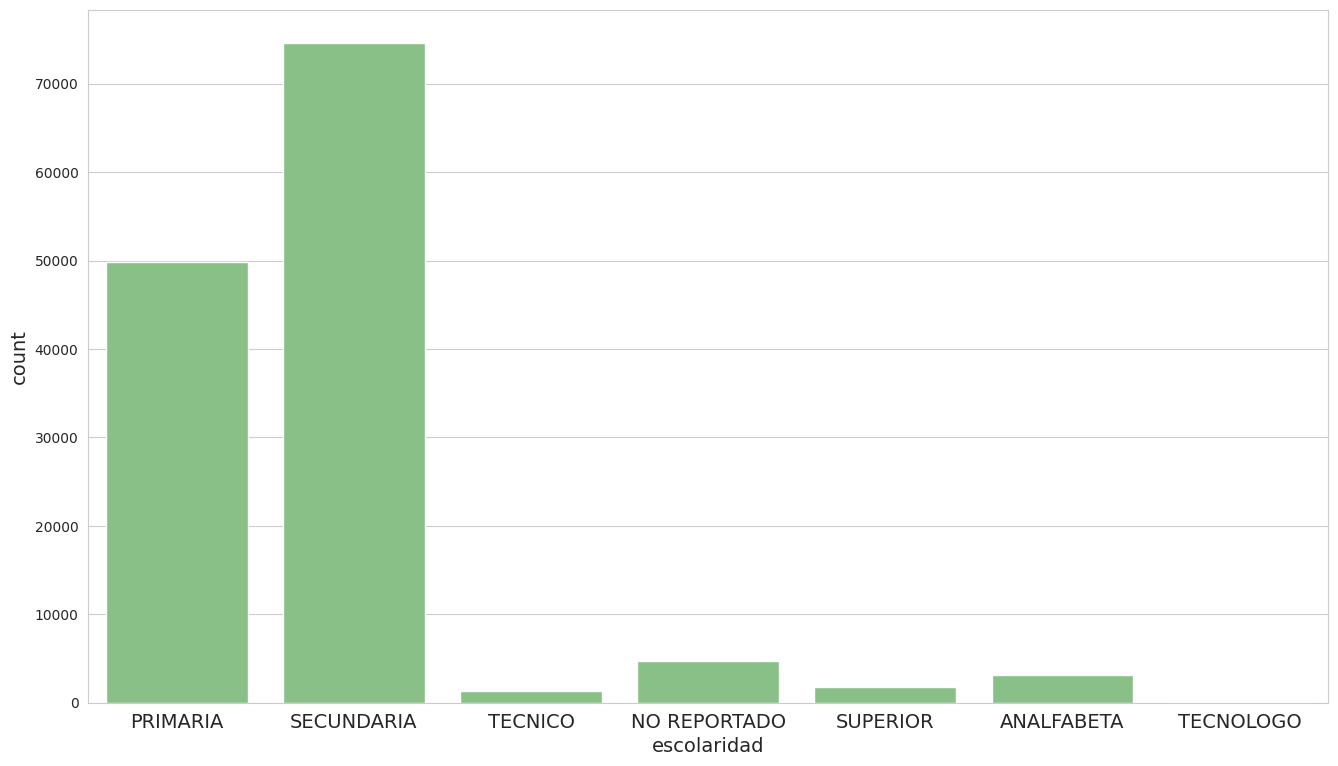

In [ ]:
plt.figure(figsize=(16,9))

sns.countplot(
    data=df_f,
    x='escolaridad',
);

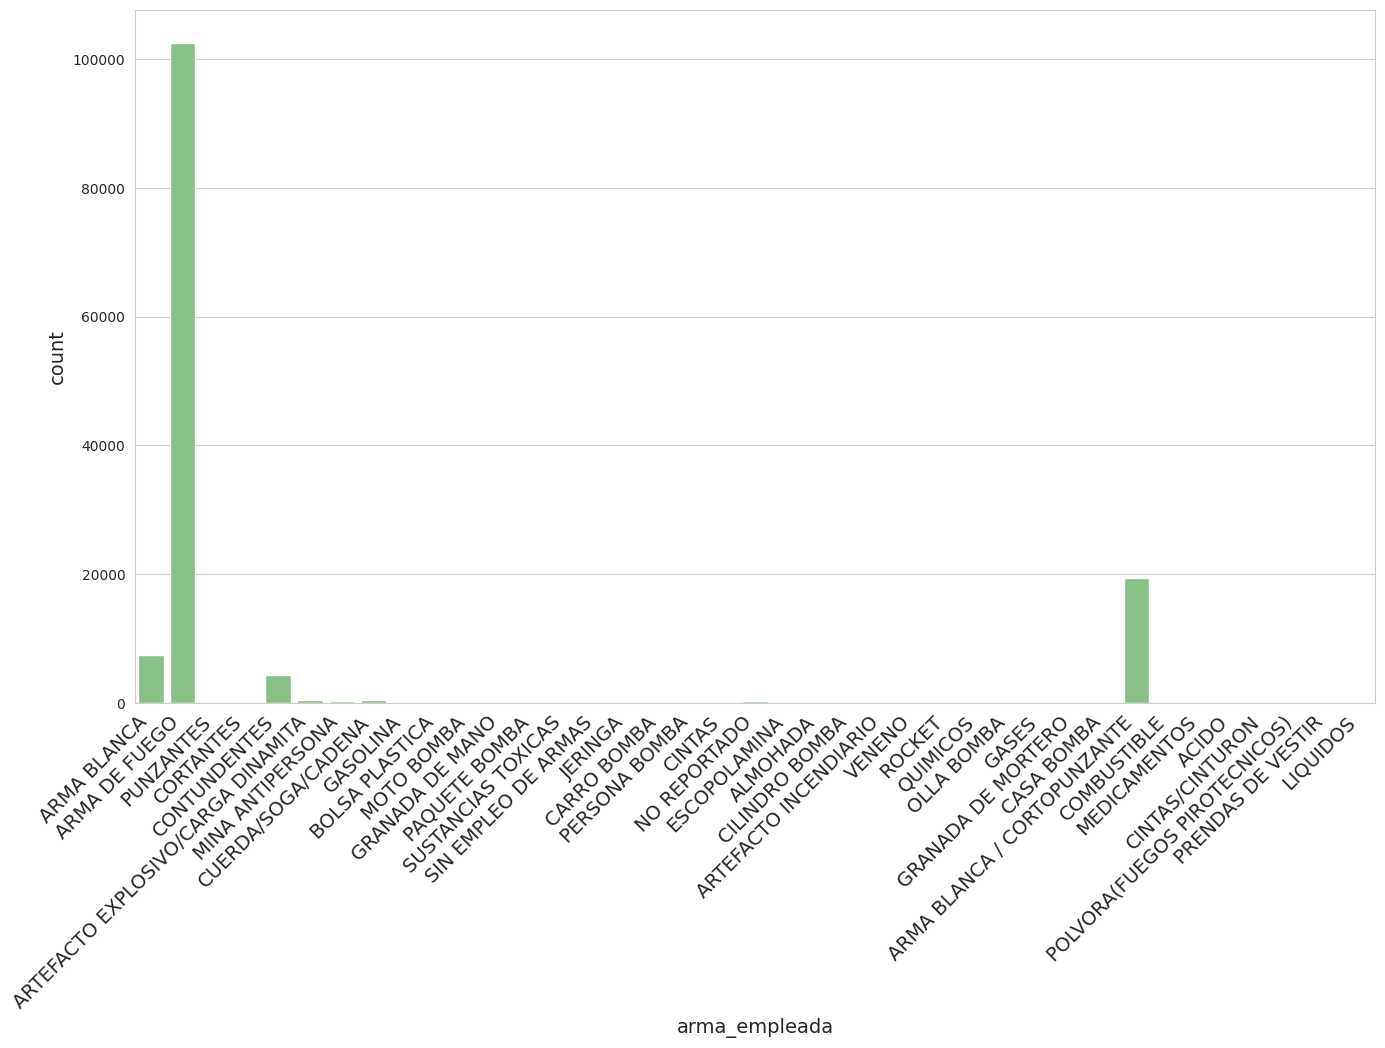

In [ ]:
plt.figure(figsize=(16,9))

sns.countplot(
    data=df_f,
    x='arma_empleada',
);
plt.xticks(rotation=45, ha='right');

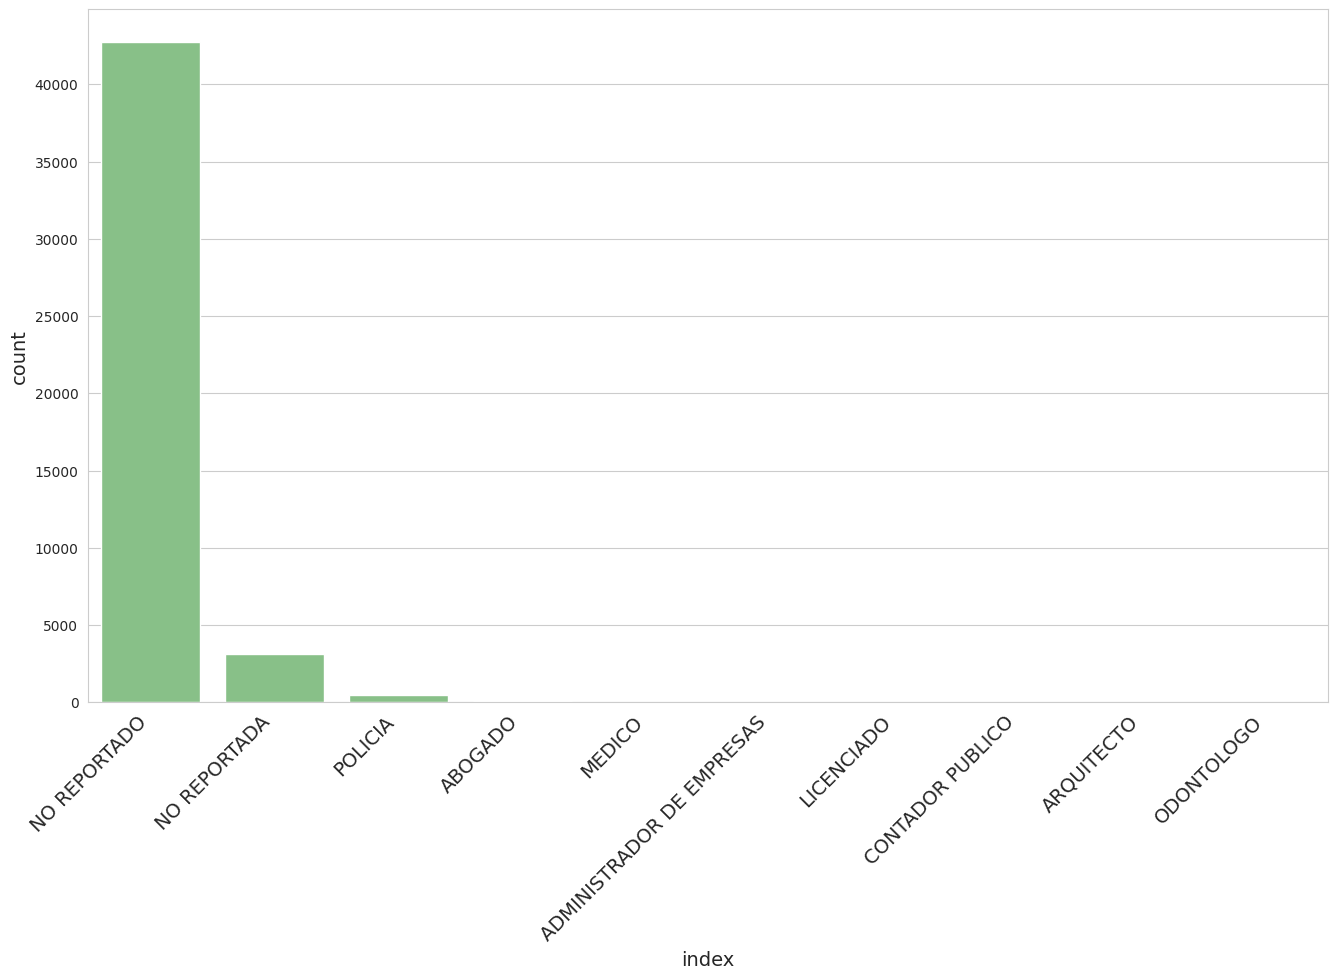

In [ ]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.profesiones.value_counts().to_frame('count').reset_index().head(10),
    x='index',
    y='count'
)

plt.xticks(rotation=45, ha='right');

<Axes: xlabel='hora_int', ylabel='count'>

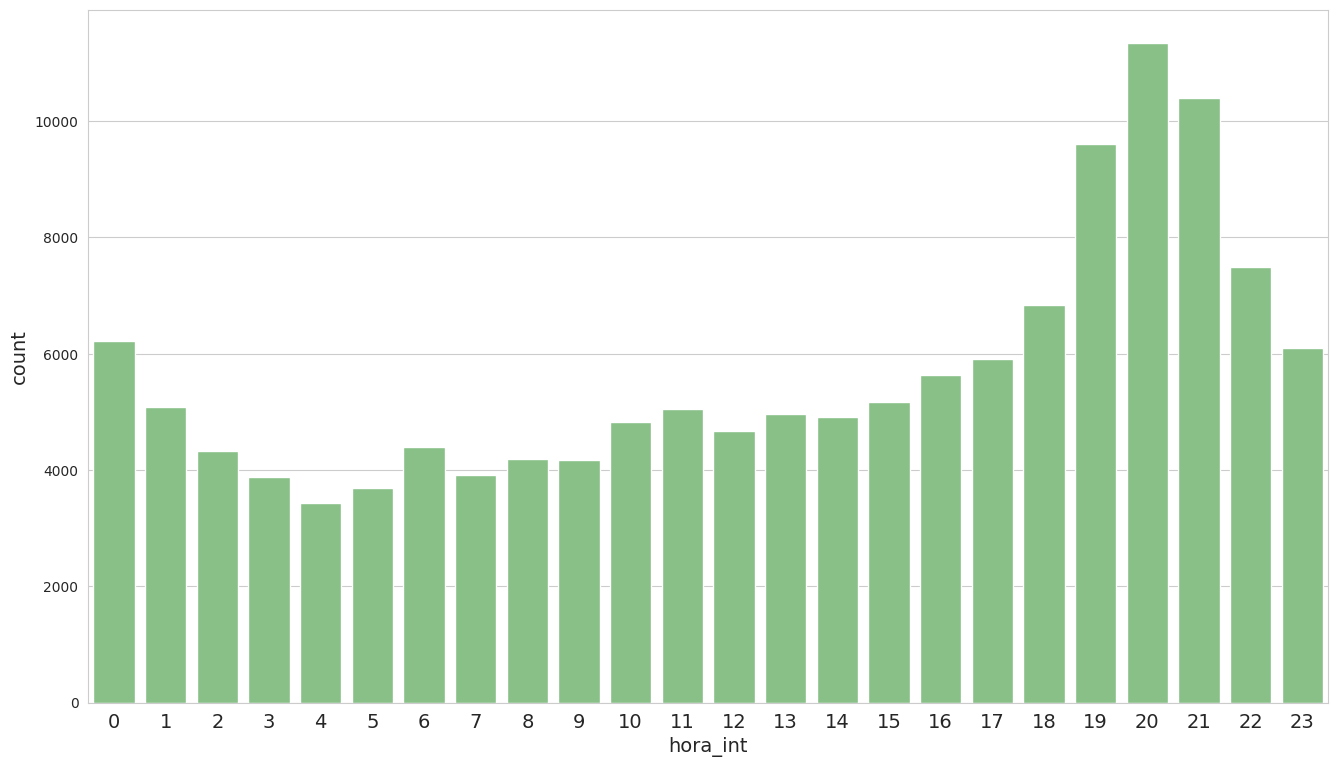

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(
    data = df_f,
    x = 'hora_int'
)

<ipython-input-41-893d20195f04>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


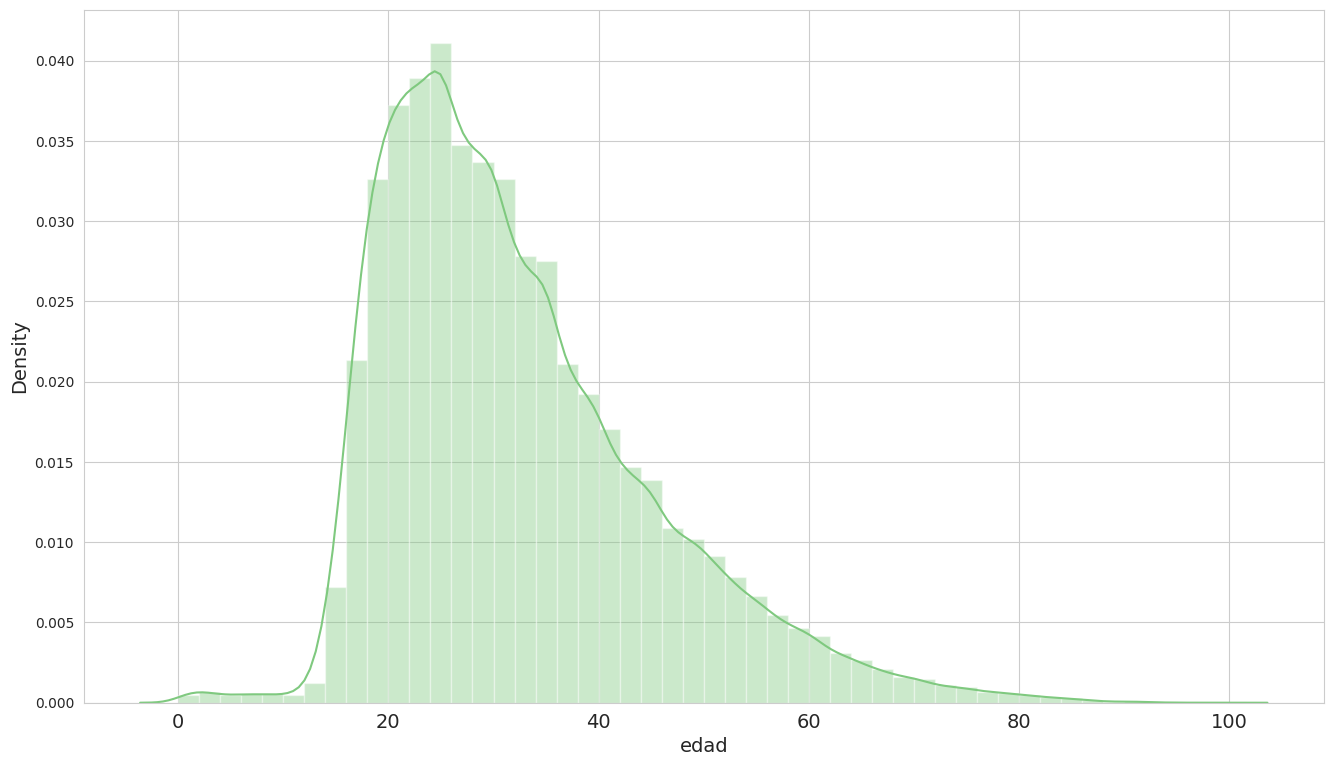

In [ ]:
plt.figure(figsize=(16,9))

sns.distplot(
    df_f.edad
);

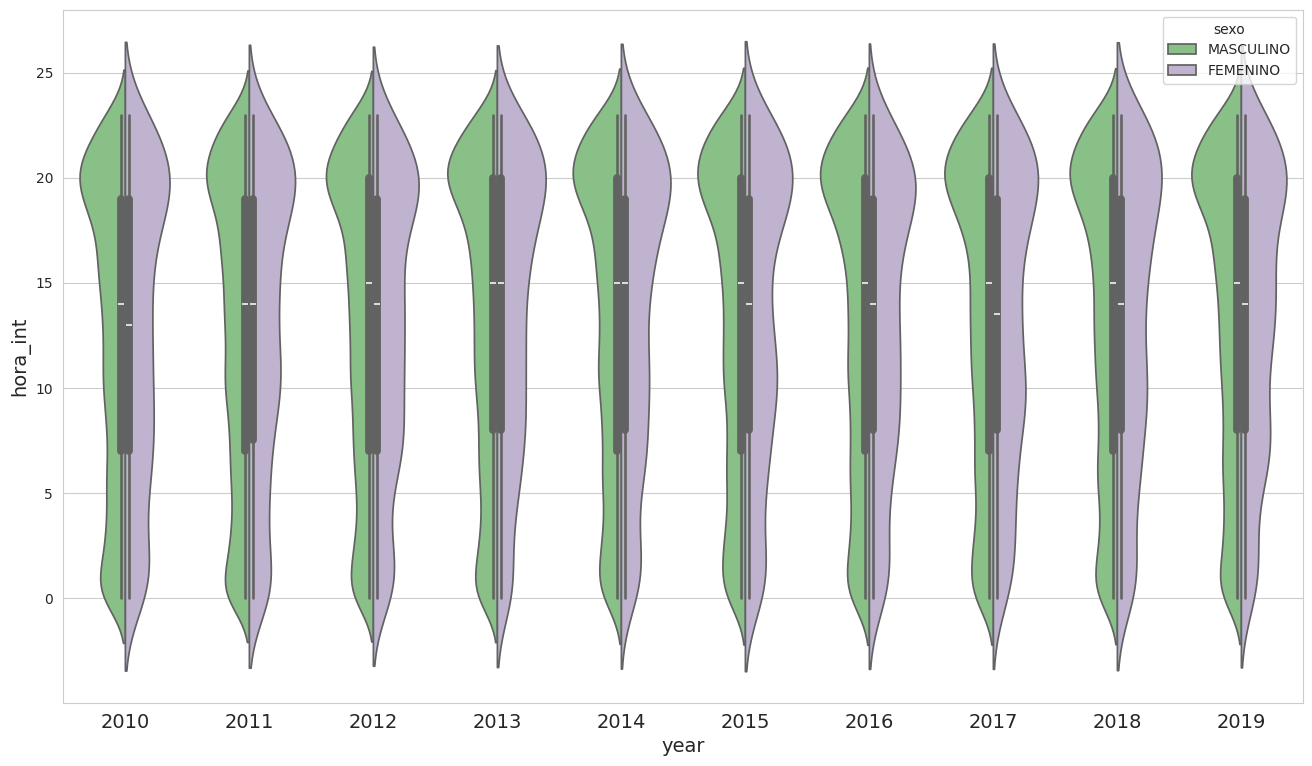

In [ ]:
sns.set_palette('Set1')
fig, ax = plt.subplots(figsize=(16,9))
sns.violinplot(
    data=df_f[df_f.sexo != "NO REPORTA"],
    x='year',
    y='hora_int',
    hue='sexo',
    ax=ax,
    split=True,
    palette="Accent"
);

<ipython-input-43-0566007f0515>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
<ipython-input-43-0566007f0515>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
<ipython-input-43-0566007f0515>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Plea

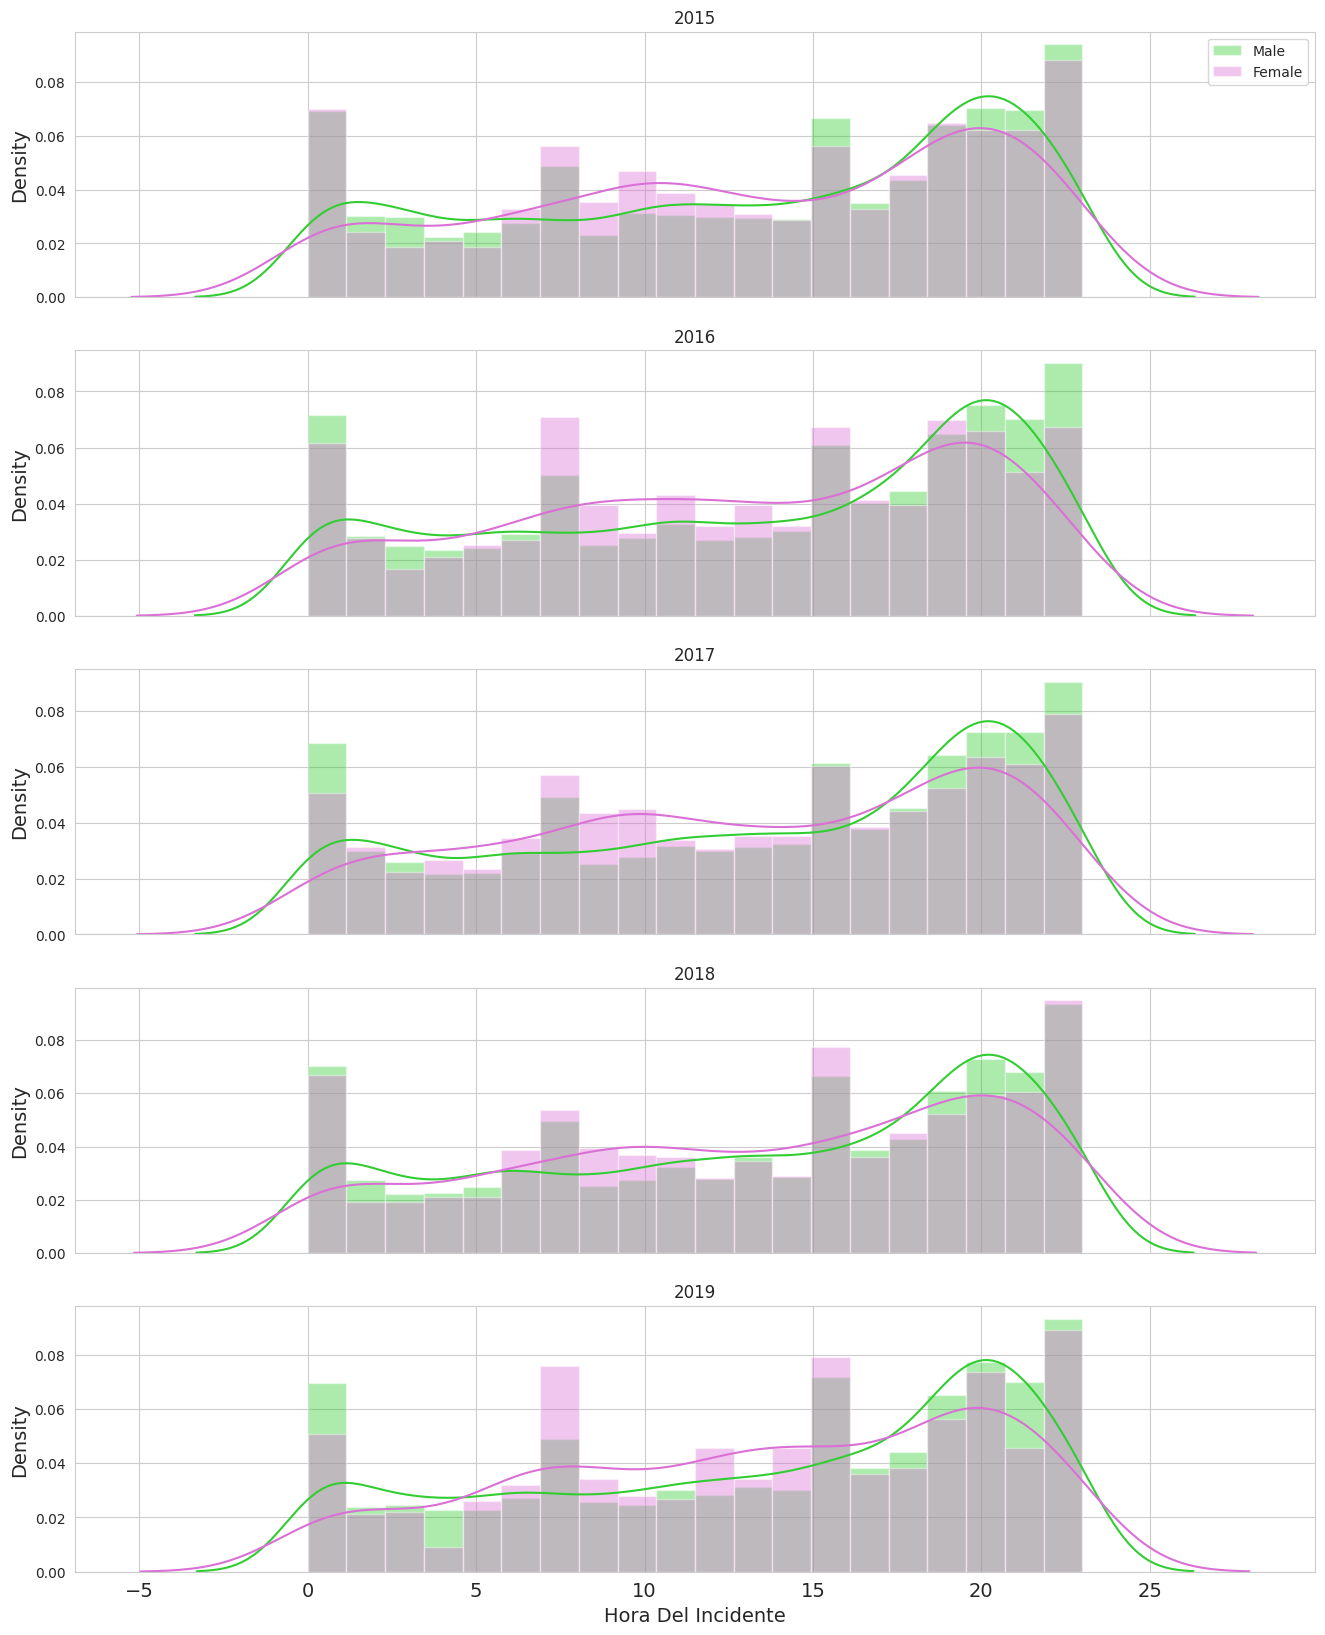

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(16,20), sharex=True)
i=0
for year in np.arange(2015,2020):
    sns.distplot(
        df_f.loc[((df_f.sexo == 'MASCULINO') & (df_f.year == year)), 'hora_int'],
        bins=20,
        color='limegreen',
        label='Male',
        ax=ax[i]
    )

    sns.distplot(
        df_f.loc[((df_f.sexo == 'FEMENINO') & (df_f.year == year)), 'hora_int'],
        bins=20,
        color='orchid',
        label='Female',
        ax=ax[i]
    )
    ax[i].set_title(str(year))
    ax[i].set_xlabel('')
    i+=1

ax[0].legend()
ax[-1].set_xlabel('Hora Del Incidente');

## Maps of counts

In [ ]:
import json

with open('/content/gdrive/My Drive/Semana_2/data/geojson_departamentos.json', 'r') as f:
    departamentos = json.load(f)

areas = pd.read_json('/content/gdrive/My Drive/Semana_2/data/areas_departamentos.json',
                     orient='index')

In [ ]:
import plotly.express as px

In [ ]:
df_f.departamento = df_f.departamento.apply(unidecode)

<ipython-input-46-a543cfe4a093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.departamento = df_f.departamento.apply(unidecode)


In [ ]:
count_2019 = df_f[df_f.year == 2019].departamento.value_counts().reset_index(name='count')
fig = px.choropleth_mapbox(
    count_2019,
    geojson=departamentos,
    locations='index',
    color='count',
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=4,
    center = {"lat": 3.47, "lon": -73.96},
    opacity=0.5
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()